In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Leemos los archivos "Dose.out" y lo cargamos como datasets

In [2]:
Dose_90_b = pd.read_csv("../Hadrontherapy/build/Dose_90_b.out", delim_whitespace=True)
Dose_70_b = pd.read_csv("../Hadrontherapy/build/Dose_70_b.out", delim_whitespace=True)
Dose_60_b = pd.read_csv("../Hadrontherapy/build/Dose_60_b.out", delim_whitespace=True)
Dose_50_b = pd.read_csv("../Hadrontherapy/build/Dose_50_b.out", delim_whitespace=True)

Vemos el contenido que contiene y su estadística básica (con uno es suficiente)

In [3]:
Dose_50_b.head()

,i,j,k,Dose(Gy),proton_1,proton_1.1,O16,O16.1
0,0,0,0,6.449640e-10,6.449640e-10,12,0.0,0
1,1,0,0,7.336760e-10,7.224090e-10,12,0.0,0
2,2,0,0,3.965410e-10,3.965410e-10,11,0.0,0
3,3,0,0,3.725210e-10,3.725210e-10,11,0.0,0
4,4,0,0,3.968540e-10,3.968540e-10,11,0.0,0


In [4]:
Dose_50_b.describe()

,i,j,k,Dose(Gy),proton_1,proton_1.1,O16,O16.1
count,97.000000,97.0,97.0,9.700000e+01,9.700000e+01,97.000000,9.700000e+01,97.000000
mean,48.000000,0.0,0.0,6.170204e-10,6.159198e-10,9.865979,7.570979e-13,0.010309
std,28.145456,0.0,0.0,2.904870e-10,2.909486e-10,1.705560,7.456550e-12,0.101535
min,0.000000,0.0,0.0,1.380340e-10,1.380340e-10,1.000000,0.000000e+00,0.000000
25%,24.000000,0.0,0.0,4.391360e-10,4.391360e-10,10.000000,0.000000e+00,0.000000
50%,48.000000,0.0,0.0,5.044300e-10,5.037320e-10,10.000000,0.000000e+00,0.000000
75%,72.000000,0.0,0.0,6.772520e-10,6.772520e-10,11.000000,0.000000e+00,0.000000
max,96.000000,0.0,0.0,1.728640e-09,1.728640e-09,12.000000,7.343850e-11,1.000000


Renombramos la columna "i" que es la dimensión por la que se mueven los protones por "mm" medidas de distancia 

In [5]:
Dose_60_b["i"] = Dose_60_b["i"] * 0.1
Dose_70_b["i"] = Dose_70_b["i"] * 0.1
Dose_50_b["i"] = Dose_50_b["i"] * 0.1
Dose_90_b["i"] = Dose_90_b["i"] * 0.1
Dose_60_b = Dose_60_b.rename(columns={"i": "mm"})
Dose_70_b = Dose_70_b.rename(columns={"i": "mm"})
Dose_50_b = Dose_50_b.rename(columns={"i": "mm"})
Dose_90_b = Dose_90_b.rename(columns={"i": "mm"})

Graficamos las 4 diferentes dosis en mismo plot para ver como se comportan

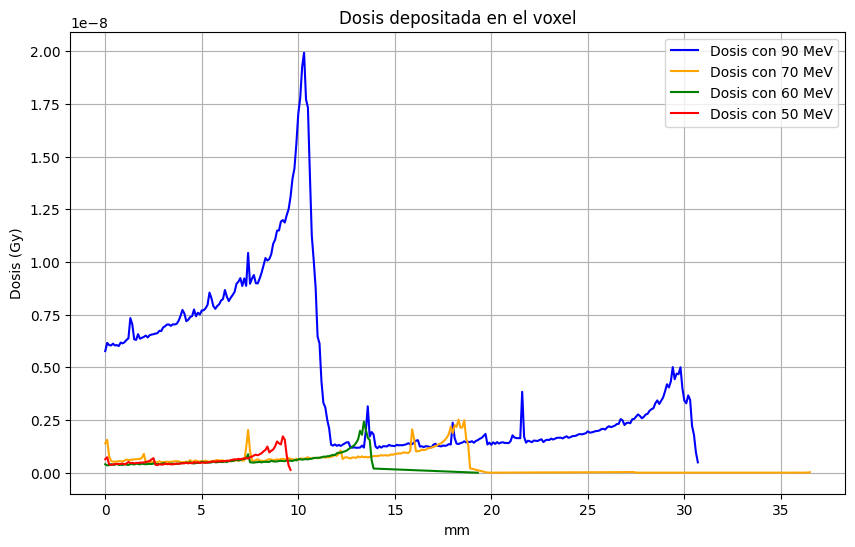

In [6]:
plt.figure(figsize=(10, 6))

plt.plot(Dose_90_b['mm'], Dose_90_b['Dose(Gy)'], label='Dosis con 90 MeV', color='blue')
plt.plot(Dose_70_b['mm'], Dose_70_b['Dose(Gy)'], label='Dosis con 70 MeV', color='orange')
plt.plot(Dose_60_b['mm'], Dose_60_b['Dose(Gy)'], label='Dosis con 60 MeV', color='green')
plt.plot(Dose_50_b['mm'], Dose_50_b['Dose(Gy)'], label='Dosis con 50 MeV', color='red')

plt.xlabel('mm')
plt.ylabel('Dosis (Gy)')
plt.title('Dosis depositada en el voxel')
plt.legend()
plt.grid(True)

plt.show()

Vemos el pico máximo y su valor correspondiente en su longitud para cada Dosis.

In [8]:
max = Dose_60_b['Dose(Gy)'].max()
value_max = Dose_60_b.loc[Dose_60_b['Dose(Gy)'].idxmax(), 'mm']
print(f'El valor máximo de Dose(Gy) es: {max}')
print(f'El valor de i correspondiente al valor máximo de Dose(Gy) es: {value_max}')

El valor máximo de Dose(Gy) es: 5.31385e-09
El valor de i correspondiente al valor máximo de Dose(Gy) es: 26.900000000000002


In [9]:
max = Dose_50_b['Dose(Gy)'].max()
value_max = Dose_50_b.loc[Dose_50_b['Dose(Gy)'].idxmax(), 'mm']
print(f'El valor máximo de Dose(Gy) es: {max}')
print(f'El valor de i correspondiente al valor máximo de Dose(Gy) es: {value_max}')

El valor máximo de Dose(Gy) es: 4.96203e-09
El valor de i correspondiente al valor máximo de Dose(Gy) es: 18.3
